# Librairies

In [1]:
from openclassrooms.p6 import *
import ast, os, warnings
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import set_config

# Config

In [2]:
STORAGE_PATH = '../data'
file_name = "data.csv"

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 500)
warnings.filterwarnings('ignore')

set_config(display="diagram")

# Data

In [3]:
data = pd.read_csv(os.path.join(STORAGE_PATH, file_name))

preprocessing_stages = ['tokens', 'tokens_sw', 'tokens_swa', 'tokens_sw_tag', 'tokens_swa_tag']

for stage in preprocessing_stages:
    data[stage] = data[stage].apply(ast.literal_eval)

# TF-IDF

In [4]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, analyzer=lambda x:x, preprocessor=lambda x:x)
BOW = vectorizer.fit_transform(data.tokens).toarray()
BOW = pd.DataFrame(data=BOW, columns=vectorizer.get_feature_names())

In [5]:
BOW

,I,a,aa,aaa,aapno,aari,aarika,ability,able,abode,about,above,abrasion,abroad,absolute,absorb,absorbency,absorbent,absorber,absorbing,abstract,abstrct,ac,accent,access,accessory,accident,accidental,accommodate,accomplish,accord,acer,ache,aching,acid,acne,across,acrylic,act,active,actual,adaa,adapter,adaptor,add,addiction,addition,additional,additionally,adhesive,adi,adida,adino,adjust,adjustable,admiration,admire,adorable,adorn,adsl,advance,advice,advisable,aero,affect,affordable,after,afternoon,again,against,agarwood,age,ageless,aging,agrasen,agree,agromech,aid,air,airport,airtel,airtex,airtight,ajmal,akshaj,akup,al,alarm,alcohol,aleo,alfajr,alive,all,allin,allover,allow,alloy,alluminium,alluring,ally,...,which,while,whisky,white,whiteherb,who,whole,why,wi,wide,widely,width,widw,wild,will,wind,window,windows,windsor,wine,winger,wining,wink,winner,winter,wipe,wire,wireless,wisdom,wish,with,within,without,withstand,wma,wo,wok,woman,wonder,wonderchef,wonderful,wood,wooden,woodino,woody,wool,word,work,working,workmanship,workstation,world,worry,worshipper,would,wow,wowan,wrap,wrapper,wring,wrinkle,wrist,write,wrought,x,xemex,xl,xp,yardley,yarn,year,yellow,yes,yet,ygs,yiboo,yield,yk,york,you,young,your,yourself,youth,youthful,yr,yuva,yve,zaicus,zero,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,0.0,0.024506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.154732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.056024,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061239,0.035958,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06392,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.151344,0.0,0.048390,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.062852,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.174279,0.068293,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065205,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032662,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.031965,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.035965,0.0,0.0,0.0,0.0,0.0,0.040346,0.000000,0.000000,0.0,0.0,0

In [6]:
BOW.sample(3)[["watch", "baby", "mug", "laptop"]]

,watch,baby,mug,laptop
177,0.00000,0.0,0.365012,0.0
989,0.00000,0.0,0.000000,0.0
763,0.31757,0.0,0.000000,0.0


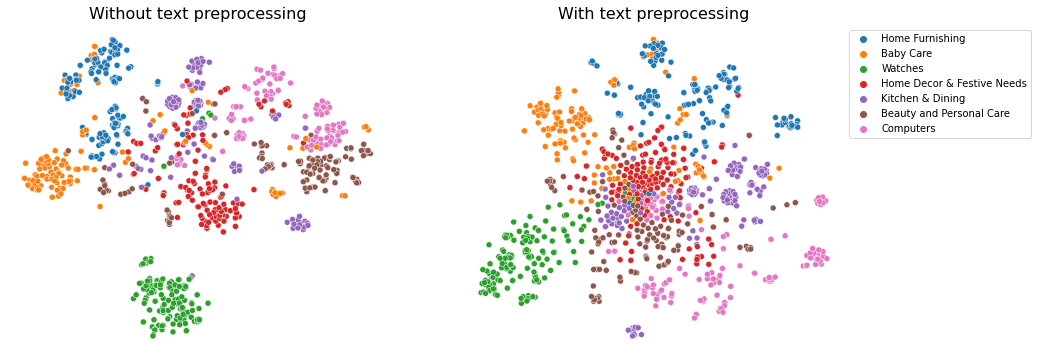

In [7]:
y = data.category_0

plt.figure(figsize=(15, 6))

plt.subplot(121)
plot_TSNE(BOW, y, axis='off', legend=False, title='Without text preprocessing')

plt.subplot(122)
BOW_prepro = vectorizer.fit_transform(data.tokens_swa_tag).toarray()
BOW_prepro = pd.DataFrame(data=BOW, columns=vectorizer.get_feature_names())
plot_TSNE(BOW_prepro, y, axis='off', legend=True, title='With text preprocessing')

plt.show()

# Classification


## Supervized approach

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [9]:
pipe = Pipeline([
    ('column_selector', ColumnsSelector()),
    ('TFIDF', TfidfVectorizer(tokenizer=lambda x: x, analyzer=lambda x:x, preprocessor=lambda x:x)),
    ('sparse_to_array', FunctionTransformer(lambda x: x.toarray())),
    ('PCA', CustomPCA()),
    ('classifier', GaussianNB())
])

param_grid = {
    'column_selector__column' : preprocessing_stages,
    'PCA__ratio': [0.90, 0.95, 0.99, None]
}

display(pipe)

Pipeline(steps=[('column_selector', ColumnsSelector()),
                ('TFIDF',
                 TfidfVectorizer(analyzer=<function <lambda> at 0x138f2c040>,
                                 preprocessor=<function <lambda> at 0x138f2c3a0>,
                                 tokenizer=<function <lambda> at 0x138f2c1f0>)),
                ('sparse_to_array',
                 FunctionTransformer(func=<function <lambda> at 0x138f2c310>)),
                ('PCA', CustomPCA()), ('classifier', GaussianNB())])

In [10]:
grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=2)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)
print('Best params: ', grid.best_params_)

Best params:  {'PCA__ratio': None, 'column_selector__column': 'tokens_sw_tag'}


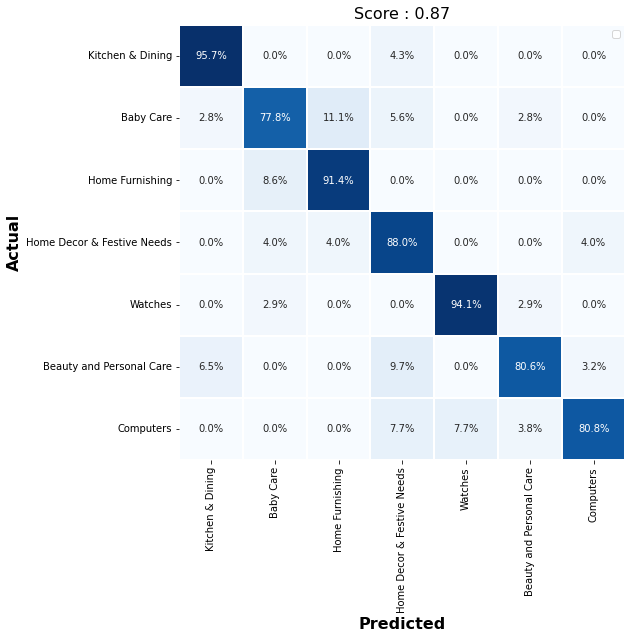

In [11]:
cm = ConfusionMatrix(y_test, y_pred, accuracy_score)
print(cm)

## Unsupervized approach

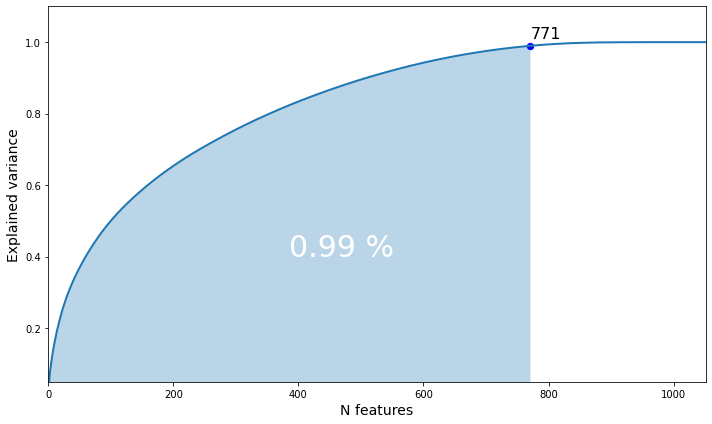

In [12]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, analyzer=lambda x:x, preprocessor=lambda x:x)
BOW = vectorizer.fit_transform(data.tokens_swa_tag).toarray()
BOW = pd.DataFrame(data=BOW, columns=vectorizer.get_feature_names())

model = PCA()
X = model.fit_transform(BOW)
chart_data = np.cumsum(model.explained_variance_ratio_)
ratio = 0.99
n_components = np.argwhere(chart_data < ratio)[-1][0]

plt.figure(figsize=(10, 6))
sns.lineplot(x = np.arange(1, len(chart_data)+1), y = chart_data,linewidth= 2)
plt.fill_between(np.arange(1, n_components + 1), y1=chart_data[:n_components], alpha=0.3)
plt.xlabel('N features', size=14)
plt.ylabel('Explained variance', size=14)
plt.tight_layout()
plt.ylim([0.05, 1.1])
plt.xlim([0, len(chart_data)+1])
plt.text(x = n_components / 2, y = 0.4, s=f'{ratio:.2} %', fontdict={'size':30, 'c':'w'})
plt.scatter(x = n_components, y = 0.99, c = 'b', s = 40)
plt.text(x = n_components, y = ratio + .02, s=n_components, size=16)
plt.show()

### Kmeans

In [16]:
X = data

kmeans = KMeans(n_clusters=data.category_0.nunique(), random_state=0)

param_grid = {
    'column_selector__column': preprocessing_stages,
    'PCA__ratio': [0.90, 0.95, 0.99]
}

pipe = Pipeline([
('column_selector', ColumnsSelector()),
('TFIDF', TfidfVectorizer(tokenizer=lambda x: x, analyzer=lambda x:x, preprocessor=lambda x:x)),
('sparse_to_array', FunctionTransformer(lambda x: x.toarray())),
('PCA', CustomPCA()),
('estimator', CustomClustering(kmeans))
])
  
display(pipe)

Pipeline(steps=[('column_selector', ColumnsSelector()),
                ('TFIDF',
                 TfidfVectorizer(analyzer=<function <lambda> at 0x138f22b80>,
                                 preprocessor=<function <lambda> at 0x138f22f70>,
                                 tokenizer=<function <lambda> at 0x138f2c160>)),
                ('sparse_to_array',
                 FunctionTransformer(func=<function <lambda> at 0x10e3fcf70>)),
                ('PCA', CustomPCA()),
                ('estimator',
                 CustomClustering(model=KMeans(n_clusters=7, random_state=0)))])

In [17]:
results = pd.DataFrame()
for parameters in tqdm(ParameterGrid(param_grid)):
    
    pipe = pipe.set_params(**parameters)
    
    pipe.fit(X, y)
    y_pred = pipe.predict(X)

    score = adjusted_rand_score(y, y_pred)
    results = results.append({'score': score, 'parameters': parameters} , ignore_index=True)


100%|███████████████████████████████████████████| 15/15 [00:58<00:00,  3.91s/it]


In [18]:
best_results_parameters = results.loc[results.score == results.score.max(), 'parameters'].iloc[0]
results.loc[results.score == results.score.max()]

,score,parameters
5,0.27739,"{'PCA__ratio': 0.95, 'column_selector__column': 'tokens'}"


In [19]:
pipe = pipe.set_params(**best_results_parameters)
pipe.fit(X, y)
y_pred = pipe.predict(X)

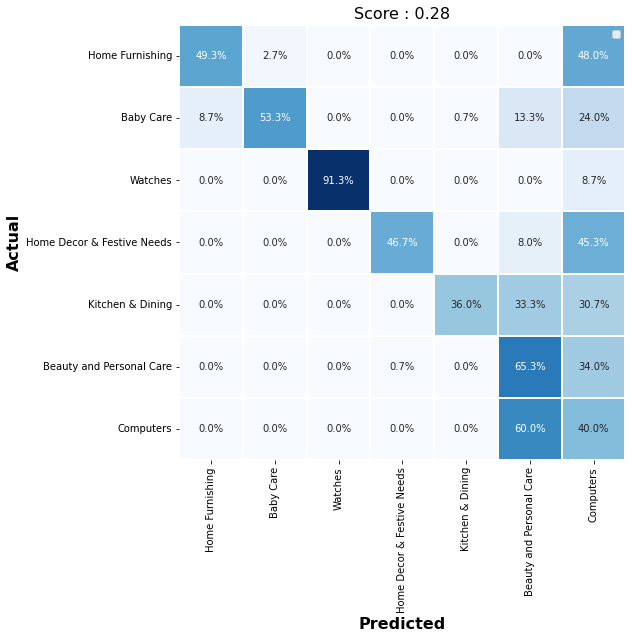

In [20]:
cm = ConfusionMatrix(y, y_pred, adjusted_rand_score)
print(cm)

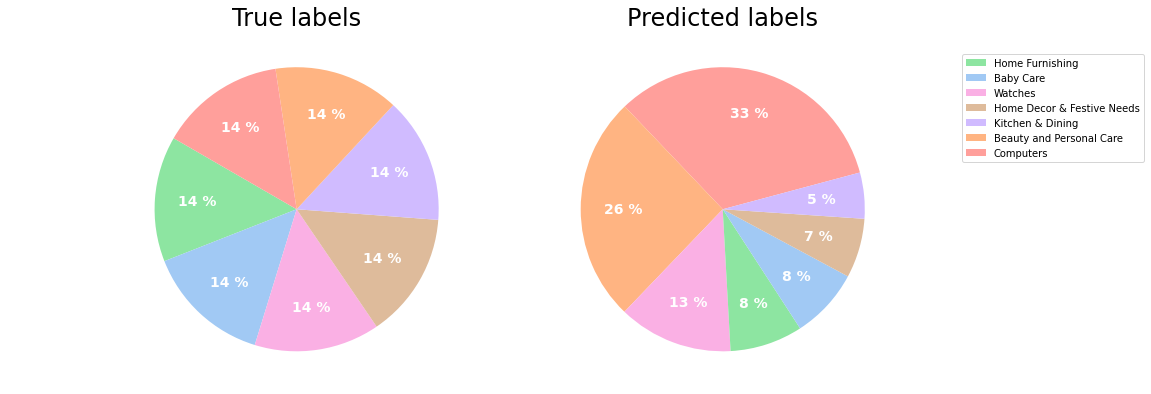

In [21]:
cd = ClusterDistribution(y, y_pred)
print(cd)

### LDA

In [28]:
pipe = Pipeline([
    ('column_selector', ColumnsSelector()),
    ('TFIDF', TfidfVectorizer(tokenizer=lambda x: x, analyzer=lambda x:x, preprocessor=lambda x:x)),    
    ('sparse_to_array', FunctionTransformer(lambda x: x.toarray())),
    ('LDA', LatentDirichletAllocation(n_components=y.nunique(), random_state=0)),
    ('argmax', FunctionTransformer(lambda x: x.argmax(axis=1))),
    ('reshape', FunctionTransformer(lambda x: x.reshape(-1, 1))),
    ('clustering', CustomClustering())
])

param_grid = {
    'column_selector__column': preprocessing_stages
}

display(pipe)

Pipeline(steps=[('column_selector', ColumnsSelector()),
                ('TFIDF',
                 TfidfVectorizer(analyzer=<function <lambda> at 0x13b191280>,
                                 preprocessor=<function <lambda> at 0x13b503430>,
                                 tokenizer=<function <lambda> at 0x13b0c4d30>)),
                ('sparse_to_array',
                 FunctionTransformer(func=<function <lambda> at 0x13b2f8dc0>)),
                ('LDA',
                 LatentDirichletAllocation(n_components=7, random_state=0)),
                ('argmax',
                 FunctionTransformer(func=<function <lambda> at 0x138f3d4c0>)),
                ('reshape',
                 FunctionTransformer(func=<function <lambda> at 0x13b122c10>)),
                ('clustering', CustomClustering())])

In [22]:
results = pd.DataFrame()

for parameters in tqdm(ParameterGrid(param_grid)):
    
    pipe = pipe.set_params(**parameters)
    pipe.fit(X, y)
    y_pred = pipe.predict(X)

    score = adjusted_rand_score(y, y_pred)
    results = results.append({'score': score, 'parameters': parameters} , ignore_index=True)

100%|█████████████████████████████████████████████| 5/5 [00:14<00:00,  2.95s/it]


In [23]:
best_results_parameters = results.loc[results.score == results.score.max(), 'parameters'].iloc[0]
results.loc[results.score == results.score.max()]

,score,parameters
4,0.176505,{'column_selector__column': 'tokens_swa_tag'}


In [24]:
pipe = pipe.set_params(**best_results_parameters)
pipe.fit(X, y)
y_pred = pipe.predict(X)

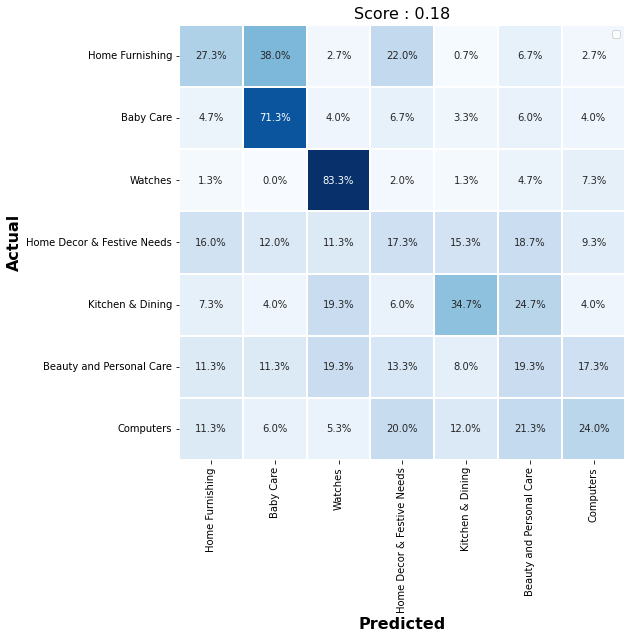

In [25]:
cm = ConfusionMatrix(y, y_pred, adjusted_rand_score)
print(cm)

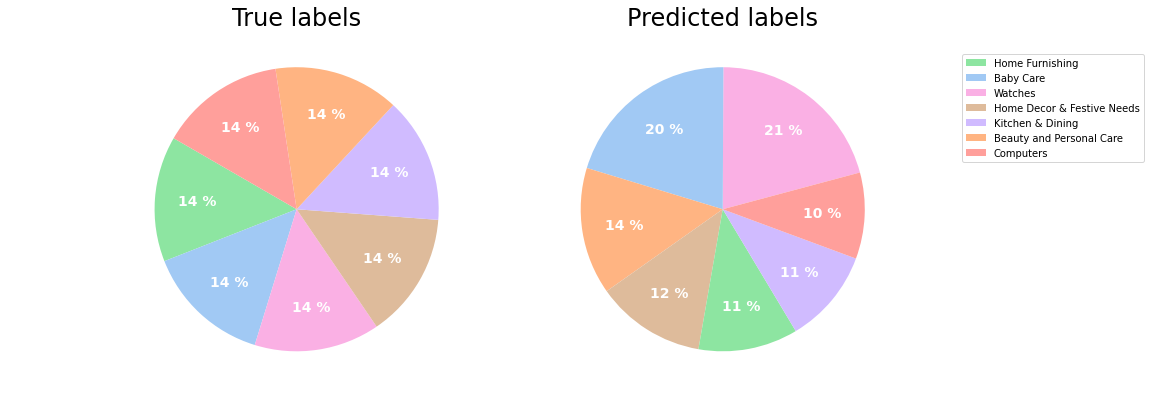

In [26]:
cd = ClusterDistribution(y, y_pred)
print(cd)

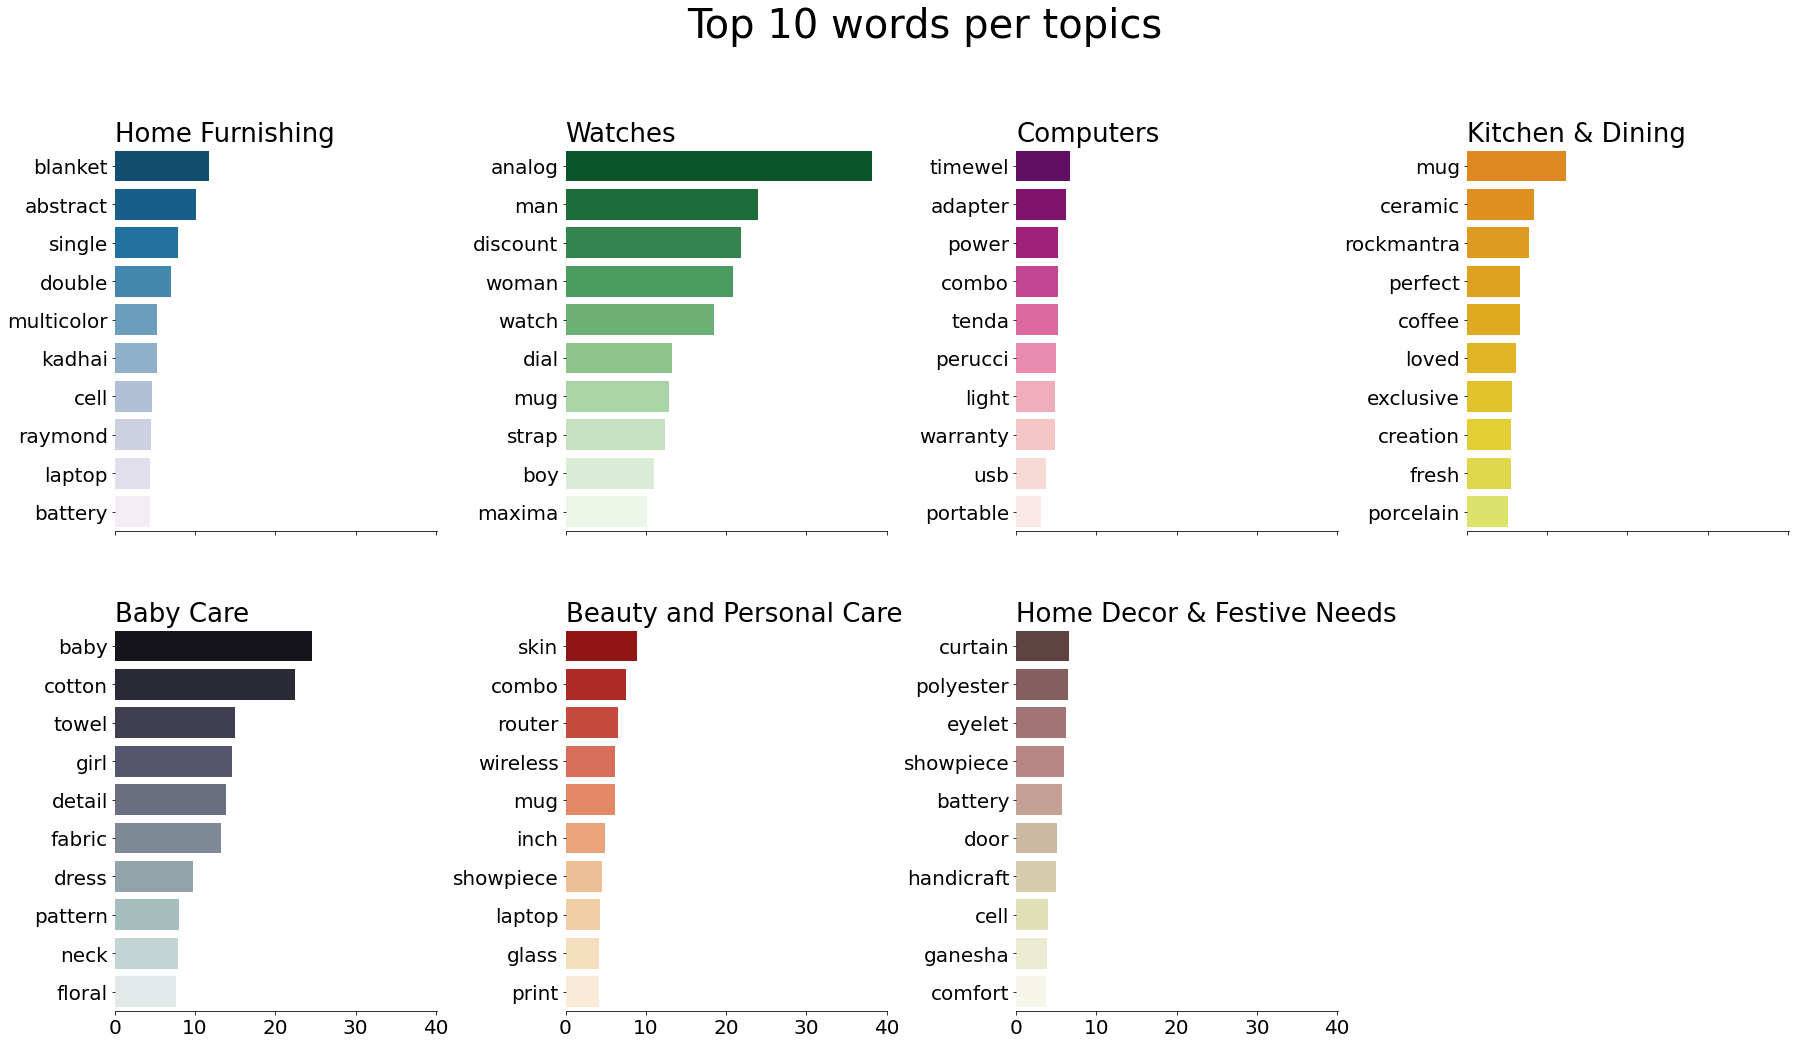

In [27]:
lda = pipe['LDA']
n_top_words = 10

fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
fig.suptitle('Top 10 words per topics', fontsize=40)
axes = axes.flatten()
colors = ['PuBu_r', 'Greens_r', 'RdPu_r', 'Wistia_r', 'bone', 'OrRd_r', 'pink']

for topic_idx, topic in enumerate(pipe['LDA'].components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [vectorizer.get_feature_names()[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    sns.barplot(x=weights, y=top_features, ax=ax, palette=colors[topic_idx], )
    ax.set_title(pipe['clustering'].classes_dict_pred_[topic_idx], fontdict={"fontsize":26}, loc='left')
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)

    
ax = axes[7]
ax.set_axis_off()
plt.subplots_adjust(top=0.85, bottom=0.05, wspace=0.4, hspace=0.25)
plt.show()